In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load data

In [3]:
df = pd.read_csv("cleaned_Apples_stock price dataset.csv" )
df.head(3)

,Unnamed: 0,timestamp,stock_price,nasdaq_index,sp500_index,inflation_rate,unemployment_rate,interest_rate,market_sentiment,date,time
0,4,2010-01-01 04:00:00,98.983464,8002.448861,2997.154387,4.270254,4.942654,1.929987,-0.223077,2010-01-01,04:00:00
1,5,2010-01-01 05:00:00,99.022103,8011.832789,3004.510779,2.321292,4.095568,1.664753,-0.828119,2010-01-01,05:00:00
2,6,2010-01-01 06:00:00,108.127409,8028.157784,3010.735533,2.626140,5.447153,2.995546,-0.813849,2010-01-01,06:00:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50592 entries, 0 to 50591
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         50592 non-null  int64  
 1   timestamp          50592 non-null  object 
 2   stock_price        50592 non-null  float64
 3   nasdaq_index       50592 non-null  float64
 4   sp500_index        50592 non-null  float64
 5   inflation_rate     50592 non-null  float64
 6   unemployment_rate  50592 non-null  float64
 7   interest_rate      50592 non-null  float64
 8   market_sentiment   50592 non-null  float64
 9   date               50592 non-null  object 
 10  time               50592 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 4.2+ MB


In [5]:
X = df.select_dtypes(include="float64")
print(X.columns)

Index(['stock_price', 'nasdaq_index', 'sp500_index', 'inflation_rate',
       'unemployment_rate', 'interest_rate', 'market_sentiment'],
      dtype='object')


## Histogram

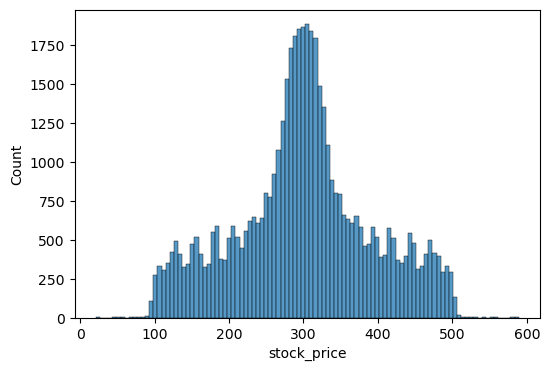

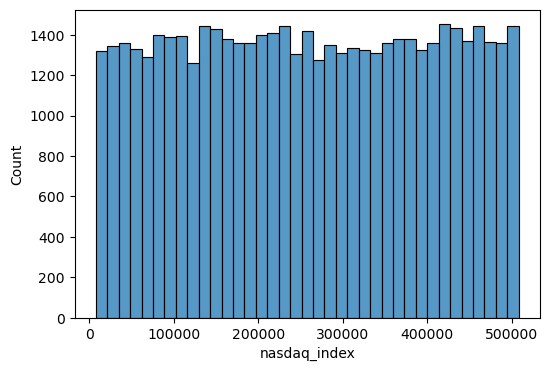

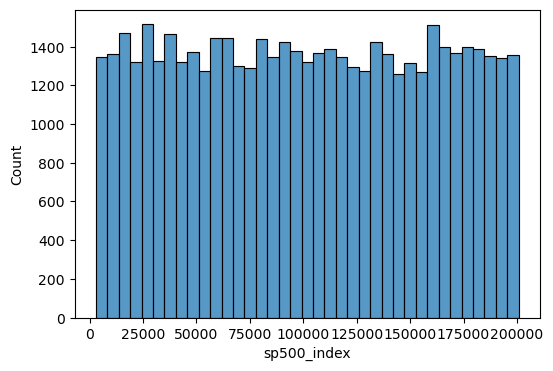

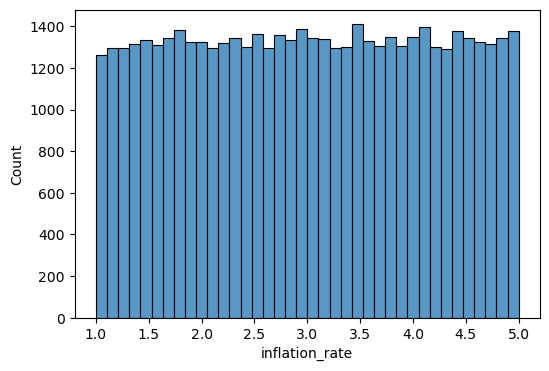

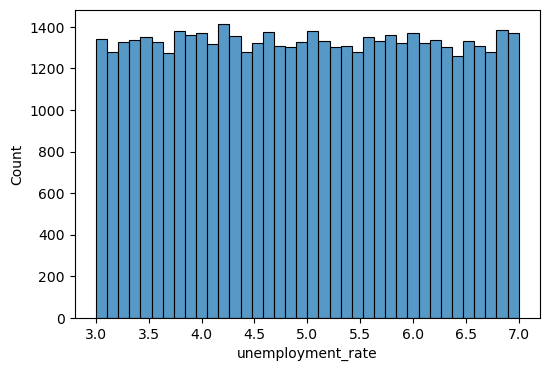

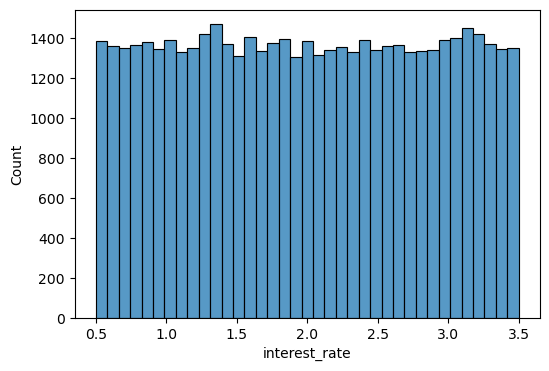

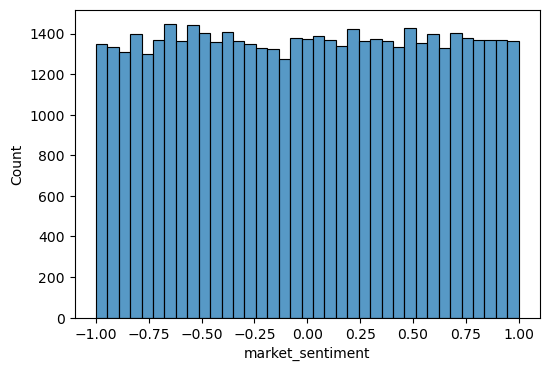

In [6]:
for feature in X:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature])
    plt.show()

# Boxplot

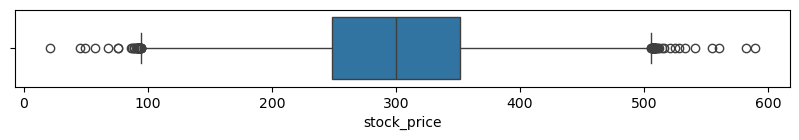

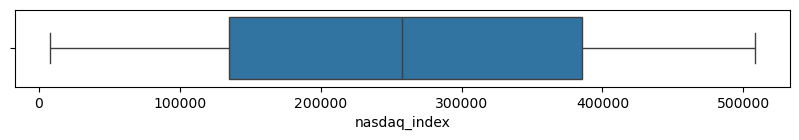

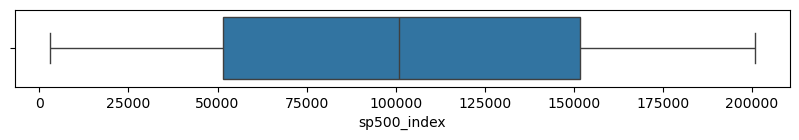

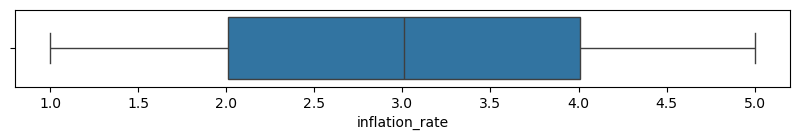

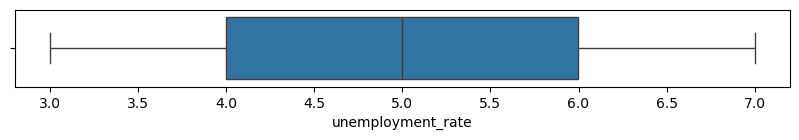

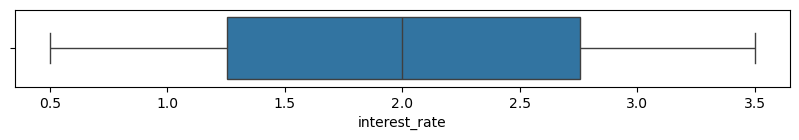

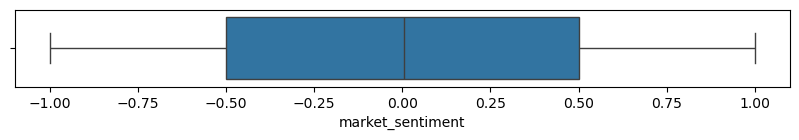

In [7]:
for feature in X:
    plt.figure(figsize=(10,1))
    sns.boxplot(df[feature], orient='h')
    plt.show()

# Handling Outliers

In [8]:
def check_outliers(feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]    
    if(len(outliers)>0):
        return True, lower_bound, upper_bound
    else:
        return False, lower_bound, upper_bound

In [9]:
def remove_outliers(feature):
    flag, lower_bound, upper_bound = check_outliers(feature)
    if(flag == True):        
        df.loc[ df[feature] > upper_bound, feature ] = upper_bound
        df.loc[ df[feature] < lower_bound, feature ] = lower_bound        
        print(f"{feature}: removed")    

In [10]:
remove_outliers('stock_price')

stock_price: removed


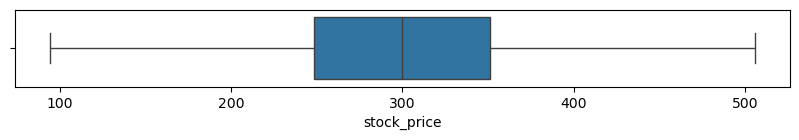

In [11]:
plt.figure(figsize=(10,1))
sns.boxplot(df['stock_price'], orient='h')
plt.show()

This boxplot shows outliers handled properly

# Correlation Matrix

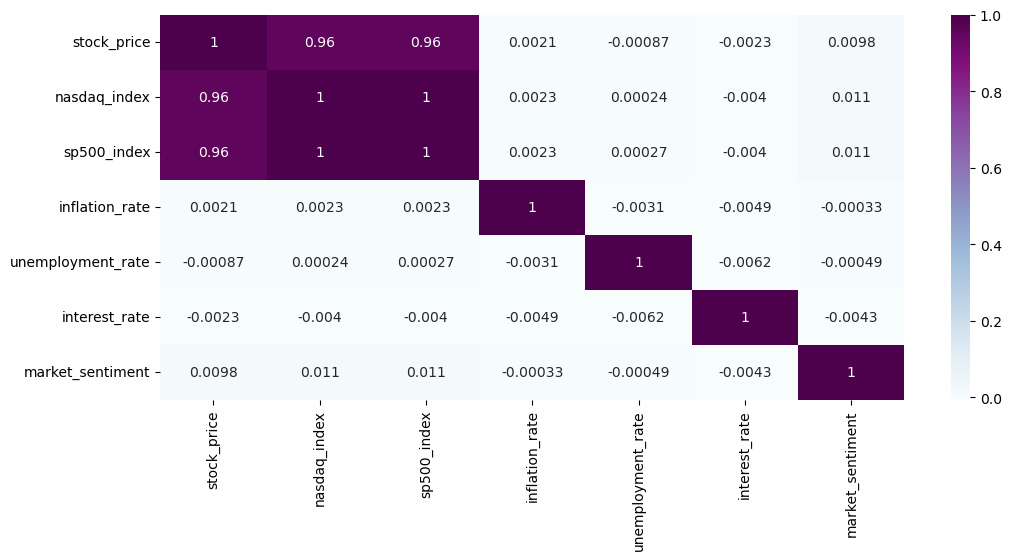

In [12]:
cr = X.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(cr,  cmap="BuPu", annot=True)
plt.show()

#### save this cleaned dataset in csv format for modelling

In [13]:
df.to_csv('completed_Apples_stock price dataset.csv')

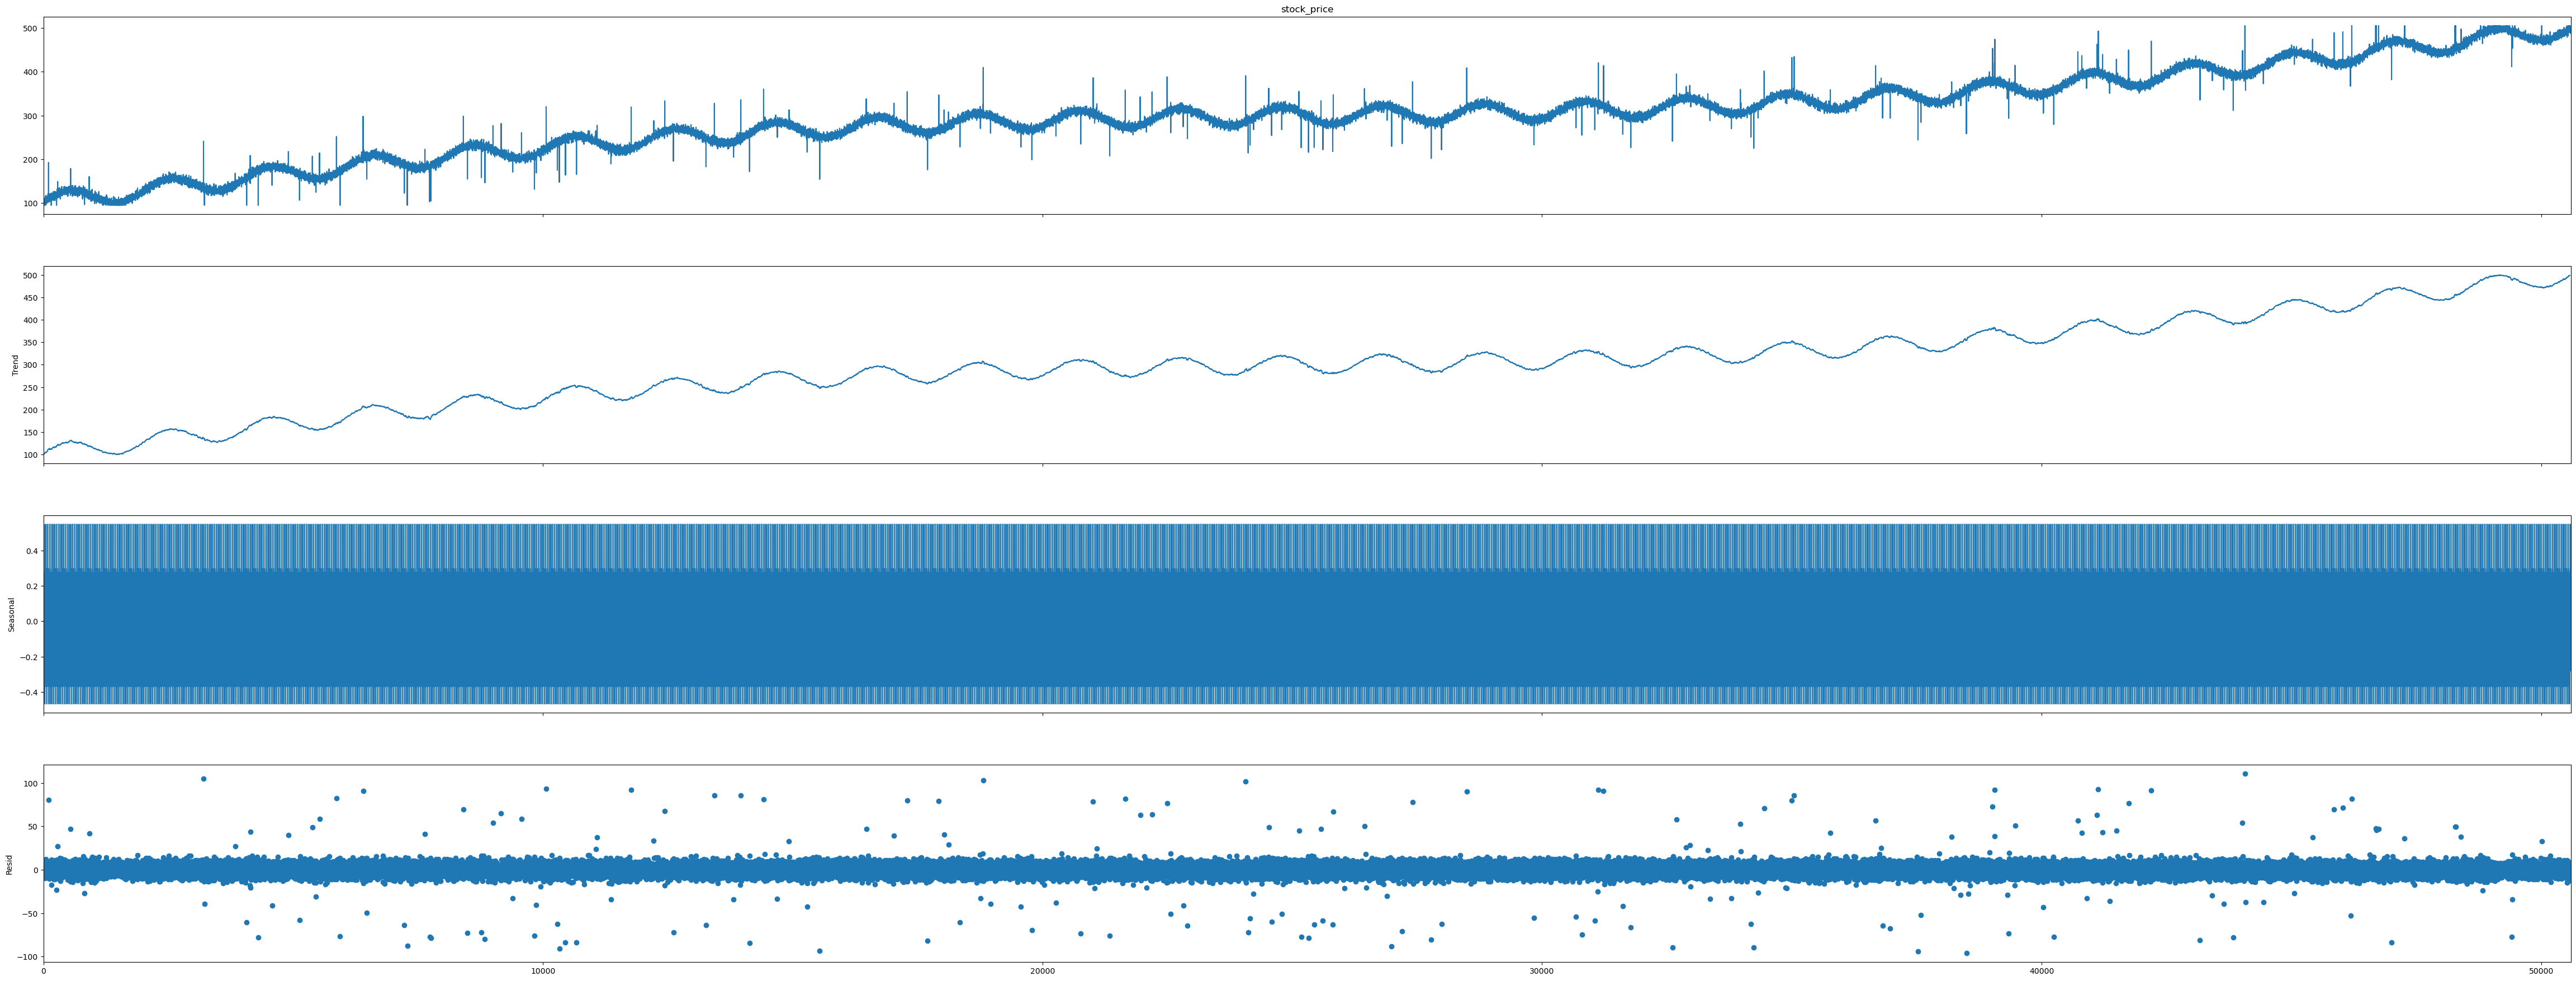

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
#plt.figure(figsize=(15,8))
decomp = seasonal_decompose(df['stock_price'], model='additive', period=36)
fig = decomp.plot()

fig.set_size_inches(55, 20) 
plt.show()